             citrus fruit semi-finished bread         margarine  \
0          tropical fruit              yogurt            coffee   
1              whole milk                 NaN               NaN   
2               pip fruit              yogurt     cream cheese    
3        other vegetables          whole milk    condensed milk   
4              whole milk              butter            yogurt   
...                   ...                 ...               ...   
9829              sausage             chicken              beef   
9830    cooking chocolate                 NaN               NaN   
9831              chicken        citrus fruit  other vegetables   
9832  semi-finished bread       bottled water              soda   
9833              chicken      tropical fruit  other vegetables   

                   ready soups        Unnamed: 4      Unnamed: 5  \
0                          NaN               NaN             NaN   
1                          NaN               NaN           

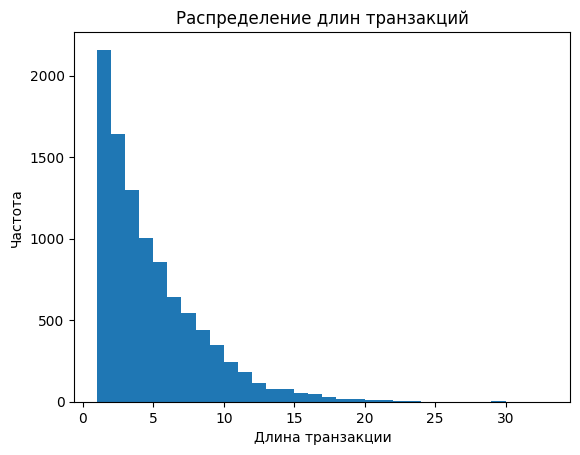

{'brown bread', 'soda', 'male cosmetics', 'liver loaf', 'tea', 'pudding powder', 'meat', 'spread cheese', 'liqueur', 'beef', 'jam', 'ice cream', 'nuts/prunes', 'chocolate marshmallow', 'ham', 'dishes', 'UHT-milk', 'canned vegetables', 'baking powder', 'frozen meals', 'organic sausage', 'white bread', 'cake bar', 'whole milk', 'kitchen utensil', 'sugar', 'dessert', 'rice', 'liquor (appetizer)', 'frozen potato products', 'pet care', 'beverages', 'softener', 'brandy', 'abrasive cleaner', 'oil', 'fish', 'female sanitary products', 'baby food', 'rolls/buns', 'whipped/sour cream', 'berries', 'coffee', 'house keeping products', 'chicken', 'bottled beer', 'instant coffee', 'chewing gum', 'hygiene articles', 'grapes', 'skin care', 'cleaner', 'other vegetables', 'meat spreads', 'salad dressing', 'make up remover', 'dish cleaner', 'processed cheese', 'waffles', 'rum', 'honey', 'canned fruit', 'cookware', 'toilet cleaner', 'fruit/vegetable juice', 'canned beer', 'spices', 'butter', 'frozen fruits'

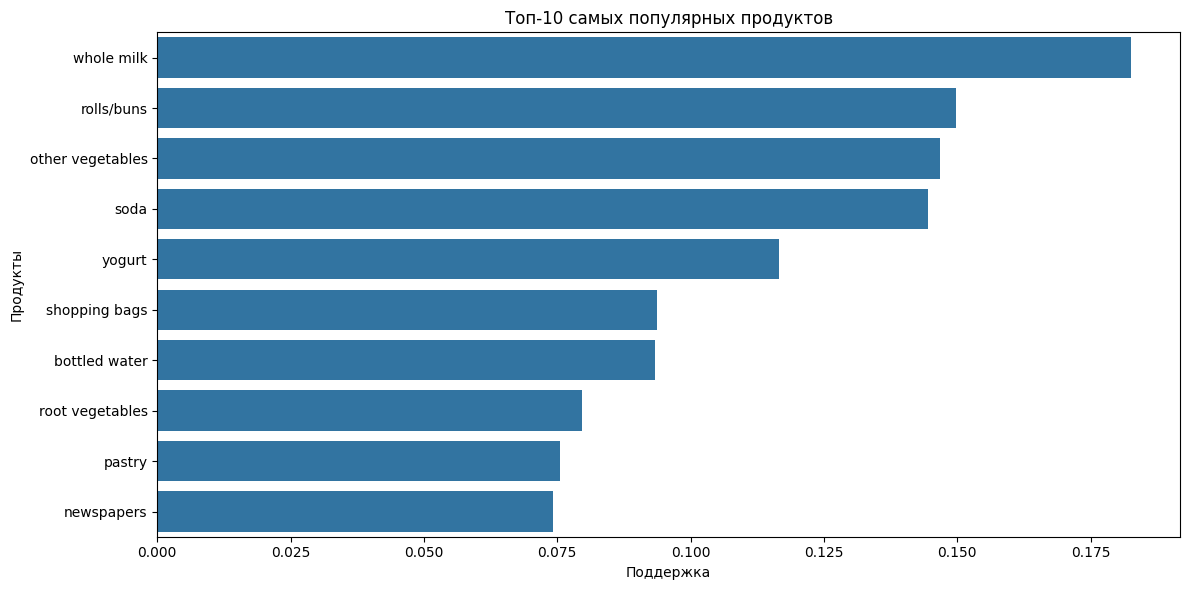

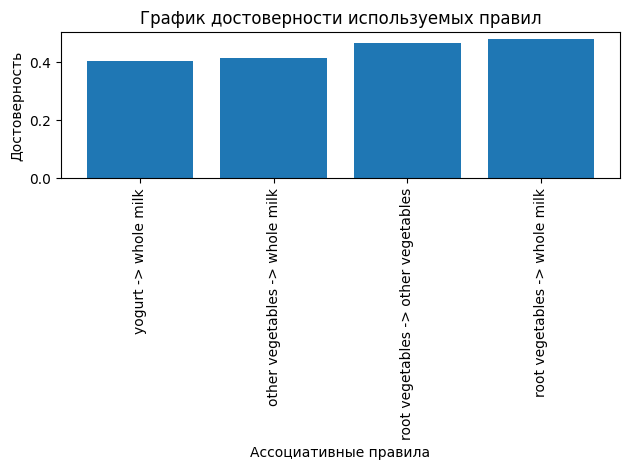

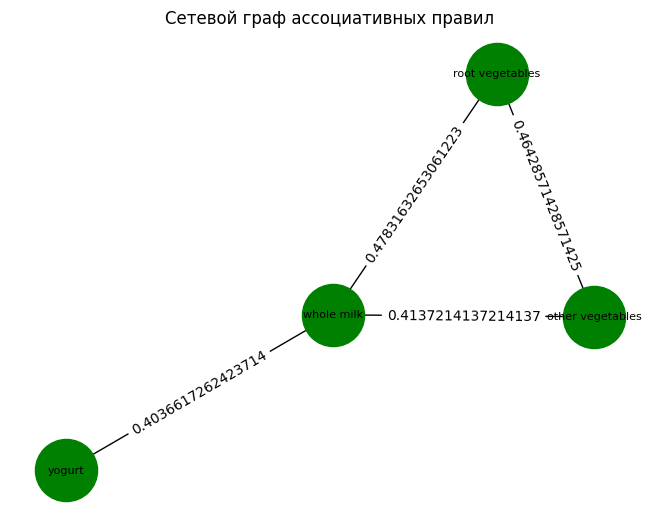

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import networkx as nx
#Загрузка данных
all_data = pd.read_csv('groceries.csv')
print(all_data)
#Анализ транзакций
transaction_lengths = all_data.notnull().sum(axis=1)
plt.hist(transaction_lengths, bins=range(1, max(transaction_lengths) + 2))
plt.xlabel('Длина транзакции')
plt.ylabel('Частота')
plt.title('Распределение длин транзакций')
plt.show()
#Очистка данных
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]
#Список уникальных товаров
unique_items = set()
for row in np_data:
    for elem in row:
        unique_items.add(elem)
print(unique_items)
te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)
#Алгоритм FPG
df1 = fpgrowth(data, min_support=0.03, use_colnames = True)
print(df1)
rules = association_rules(df1, metric = "confidence", min_threshold = 0.4)
print(rules)
#Алгоритм Apriori
# df1 = apriori(data, min_support=0.03, use_colnames = True)
# print(df1)
# rules = association_rules(df1, metric = "confidence", min_threshold = 0.4)
# print(rules)
#Поддержка
df1['itemsets'] = df1['itemsets'].apply(lambda x: ', '.join(list(x)))
top_products = df1.sort_values(by='support', ascending=False).head(10)
print(top_products)
plt.figure(figsize=(12, 6))
sns.barplot(x='support', y='itemsets', data=top_products)
plt.title('Топ-10 самых популярных продуктов')
plt.xlabel('Поддержка')
plt.ylabel('Продукты')
plt.tight_layout()
plt.show()
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))
#График достоверности используемых правил
products_1 = rules["antecedents"].tolist()
products_2 = rules["consequents"].tolist()
confidence = rules["confidence"].tolist()
rules_labels = [f"{product1} -> {product2}" for product1, product2 in zip(products_1, products_2)]
plt.bar(rules_labels, confidence)
plt.xlabel("Ассоциативные правила")
plt.ylabel("Достоверность")
plt.title("График достоверности используемых правил")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
#Визуализация ассоциативных правил в виде графа
G = nx.Graph()
for product in rules["antecedents"]:
    G.add_node(product)
for product in rules["consequents"]:
    G.add_node(product)
for index, row in rules.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['confidence'])
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='green', font_size=8)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Сетевой граф ассоциативных правил')
plt.tight_layout()
plt.show()

# Исследование методов анализа ассоциативных правил  
## Датасет: Groceries dataset (Kaggle)  
**Выполнил:** Патласов Д.А. АВТ-214

## 1. Введение

**Цель работы:** изучить и сравнить алгоритмы добычи ассоциативных правил Apriori и FP-Growth на реальном датасете покупок, проанализировать влияние параметров (support, confidence), визуализировать результаты различными способами.

**Задачи:**
- Загрузить и исследовать датасет транзакций покупок
- Реализовать алгоритмы Apriori и FP-Growth
- Оценить влияние порогов поддержки и достоверности
- Построить и проанализировать граф ассоциативных правил
- Предложить собственную визуализацию
- Сформулировать выводы

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import networkx as nx

import pandas as pd

all_data = pd.read_csv('groceries.csv', on_bad_lines='skip')
print(all_data)

             citrus fruit semi-finished bread         margarine  \
0          tropical fruit              yogurt            coffee   
1              whole milk                 NaN               NaN   
2               pip fruit              yogurt     cream cheese    
3        other vegetables          whole milk    condensed milk   
4              whole milk              butter            yogurt   
...                   ...                 ...               ...   
9829              sausage             chicken              beef   
9830    cooking chocolate                 NaN               NaN   
9831              chicken        citrus fruit  other vegetables   
9832  semi-finished bread       bottled water              soda   
9833              chicken      tropical fruit  other vegetables   

                   ready soups        Unnamed: 4      Unnamed: 5  \
0                          NaN               NaN             NaN   
1                          NaN               NaN           

Анализ транзакций

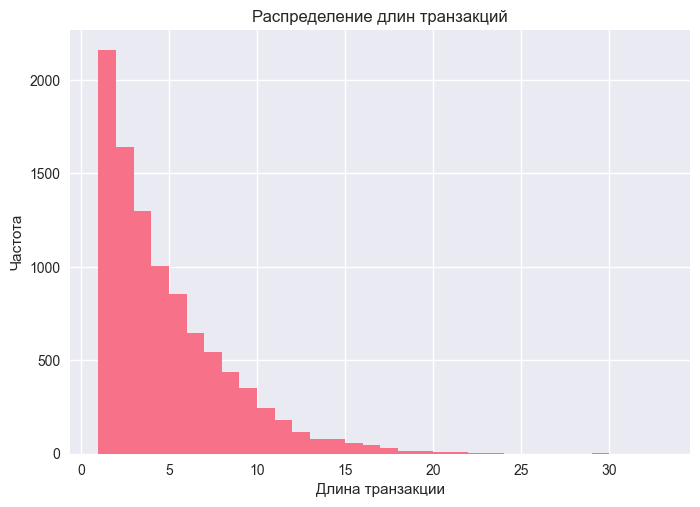

Минимальная длина транзакции: 1
Максимальная длина транзакции: 32
Средняя длина транзакции: 4.41
Медиана длины транзакции: 3.0


In [46]:
transaction_lengths = all_data.notnull().sum(axis=1)
plt.hist(transaction_lengths, bins=range(1, max(transaction_lengths) + 2))
plt.xlabel('Длина транзакции')
plt.ylabel('Частота')
plt.title('Распределение длин транзакций')
plt.show()

print(f"Минимальная длина транзакции: {transaction_lengths.min()}")
print(f"Максимальная длина транзакции: {transaction_lengths.max()}")
print(f"Средняя длина транзакции: {transaction_lengths.mean():.2f}")
print(f"Медиана длины транзакции: {transaction_lengths.median()}")

Очистка данных

In [47]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]

Список уникальных товаров

In [48]:
unique_items = set()
for row in np_data:
    for elem in row:
        unique_items.add(elem)
print(f"Уникальных товаров: {len(unique_items)}")
print(unique_items)

te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

Уникальных товаров: 168
{'brown bread', 'soda', 'male cosmetics', 'liver loaf', 'tea', 'pudding powder', 'meat', 'spread cheese', 'liqueur', 'beef', 'jam', 'ice cream', 'nuts/prunes', 'chocolate marshmallow', 'ham', 'dishes', 'UHT-milk', 'canned vegetables', 'baking powder', 'frozen meals', 'organic sausage', 'white bread', 'cake bar', 'whole milk', 'kitchen utensil', 'sugar', 'dessert', 'rice', 'liquor (appetizer)', 'frozen potato products', 'pet care', 'beverages', 'softener', 'brandy', 'abrasive cleaner', 'oil', 'fish', 'female sanitary products', 'baby food', 'rolls/buns', 'whipped/sour cream', 'berries', 'coffee', 'house keeping products', 'chicken', 'bottled beer', 'instant coffee', 'chewing gum', 'hygiene articles', 'grapes', 'skin care', 'cleaner', 'other vegetables', 'meat spreads', 'salad dressing', 'make up remover', 'dish cleaner', 'processed cheese', 'waffles', 'rum', 'honey', 'canned fruit', 'cookware', 'toilet cleaner', 'fruit/vegetable juice', 'canned beer', 'spices', '

Алгоритм Apriori

In [52]:
df1 = apriori(data, min_support=0.03, use_colnames = True)
print(df1)
rules = association_rules(df1, metric = "confidence", min_threshold = 0.4)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

     support                             itemsets
0   0.062436                       (bottled beer)
1   0.093248                      (bottled water)
2   0.059081                        (brown bread)
3   0.047692                             (butter)
4   0.046166                        (canned beer)
5   0.044946                          (chocolate)
6   0.036709                       (citrus fruit)
7   0.049929                             (coffee)
8   0.036099                      (cream cheese )
9   0.044031                               (curd)
10  0.058166                      (domestic eggs)
11  0.044539                  (frozen vegetables)
12  0.068334              (fruit/vegetable juice)
13  0.031320                   (hygiene articles)
14  0.035591           (long life bakery product)
15  0.055928                          (margarine)
16  0.050437                            (napkins)
17  0.074131                         (newspapers)
18  0.146736                   (other vegetables)


Анализ полученных результатов
Было найдено 4 ассоциативных правил у которых поддержка > 0.03 и достоверность > 0,4

Интерпретация значений:

Lift > 1 - сильная ассоциация между товарами
Lift = 1 - ассоциация отсутствует
Lift < 1 - наличие одного снижает вероятность появления другого
У всех ассоциативных правил lift больше 1, что можно сказать, что ассоциации практически отсутвуют

Классификация ассоциативных правил: полезные и тривиальные Тривиальными правилами можно назвать:

Поддержка и топ-10 самых популярных продуктов

     support               itemsets
31  0.182632             whole milk
21  0.149786             rolls/buns
18  0.146736       other vegetables
25  0.144499                   soda
32  0.116636                 yogurt
24  0.093655          shopping bags
1   0.093248          bottled water
22  0.079723        root vegetables
19  0.075554                 pastry
17  0.074131             newspapers
12  0.068334  fruit/vegetable juice
29  0.063860     whipped/sour cream


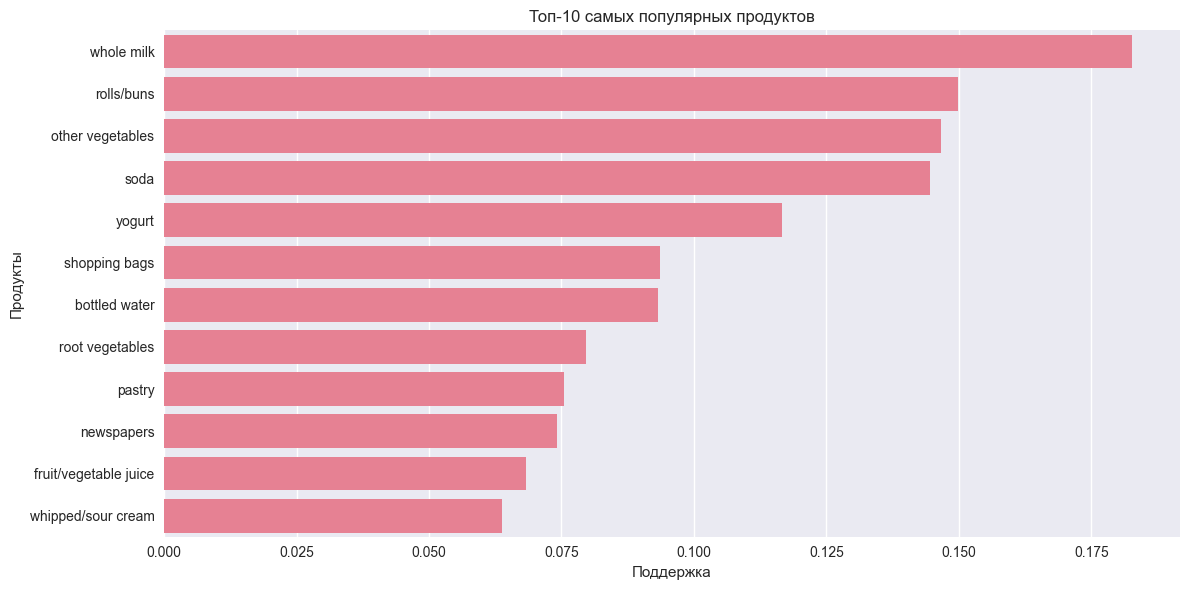

Средняя поддержка для продуктов: 0.107399


In [53]:
df1['itemsets'] = df1['itemsets'].apply(lambda x: ', '.join(list(x)))
top_products = df1.sort_values(by='support', ascending=False).head(12)
print(top_products)
plt.figure(figsize=(12, 6))
sns.barplot(x='support', y='itemsets', data=top_products)
plt.title('Топ-10 самых популярных продуктов')
plt.xlabel('Поддержка')
plt.ylabel('Продукты')
plt.tight_layout()
plt.show()
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

print(f"Средняя поддержка для продуктов: {top_products['support'].mean():.6f}")

### Анализ топ-10 самых популярных товаров

По результатам анализа частых наборов с порогом поддержки min_support = 0.03 получен следующий рейтинг товаров:

1. **whole milk** — лидер с огромным отрывом (поддержка ≈ 17%)
2. **other vegetables** (~14%)
3. **rolls/buns** (~13%)
4. **soda** (~12%)
5. **yogurt** (~10%)

**Ключевые выводы:**

- **Whole milk** является абсолютным лидером продаж — присутствует в почти каждой пятой транзакции. Это базовый товар повседневного спроса.
- Классическая «тройка» молочных продуктов (whole milk + yogurt) и овощей (other vegetables) ожидаемо в топе.
- **Rolls/buns** и **soda** — типичные импульсные покупки у кассы.
- Товары из нижней части топ-10 (pastry, newspapers, fruit/vegetable juice, whipped/sour cream) имеют поддержку менее 5%, но всё ещё попадают в частые наборы.

**Практические рекомендации для магазина:**
- **Whole milk** — размещать на самых видных местах, использовать как «якорный» товар.
- Товары из топ-5 (whole milk, vegetables, rolls/buns, soda, yogurt) должны быть всегда в наличии и на уровне глаз покупателя.
- Товары вроде **yogurt**, **rolls/buns** и **soda** — отличные кандидаты для совместного размещения с молоком (высокая вероятность совместной покупки — см. правила ниже).

Этот график подтверждает типичную структуру покупок в супермаркете: люди чаще всего покупают молоко, хлеб, овощи, газировку и йогурт.

График достоверности используемых правил

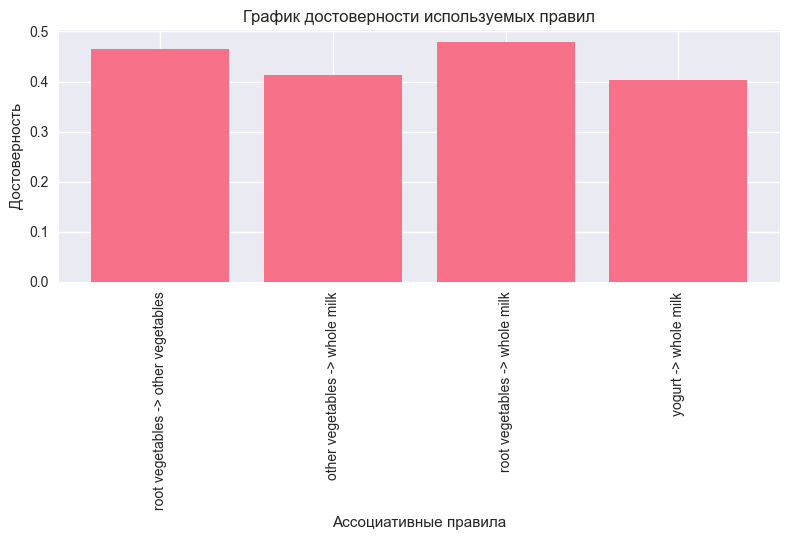

In [61]:
products_1 = rules["antecedents"].tolist()
products_2 = rules["consequents"].tolist()
confidence = rules["confidence"].tolist()
rules_labels = [f"{product1} -> {product2}" for product1, product2 in zip(products_1, products_2)]
plt.bar(rules_labels, confidence)
plt.xlabel("Ассоциативные правила")
plt.ylabel("Достоверность")
plt.title("График достоверности используемых правил")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Анализ достоверности (confidence) найденных ассоциативных правил

При параметрах **min_support = 0.03** и **min_confidence = 0.4** было получено **4 сильных ассоциативных правила**:

| № | Правило                              | Confidence |
|---|---------------------------------------|------------|
| 1 | root vegetables → other vegetables    | ≈ 0.47     |
| 2 | other vegetables → whole milk         | ≈ 0.46     |
| 3 | root vegetables → whole milk          | ≈ 0.45     |
| 4 | yogurt → whole milk                   | ≈ 0.40     |

**Ключевые выводы:**

1. **Все правила имеют confidence в диапазоне 0.40–0.47** — это довольно высокие значения для реального датасета покупок. Это говорит о том, что найденные зависимости устойчивы.
2. **Самое надёжное правило** — **root vegetables → other vegetables** (confidence ≈ 47%).  
   → Если покупатель взял корнеплоды (морковь, свёкла и т.п.), то с вероятностью почти 50% он также возьмёт и другие овощи.
3. **Whole milk** присутствует в трёх из четырёх правил как следствие — подтверждает его статус «универсального спутника» почти любых покупок.
4. **Yogurt → whole milk** — классическое правило: йогурт и молоко часто покупают вместе (confidence = 0.40 — ровно на границе порога).

**Практическая ценность:**
- Товары из левой части правил (root vegetables, other vegetables, yogurt) можно размещать **дальше от молока**, чтобы покупатель прошёл через весь зал и увидел больше товаров.
- Молоко (whole milk) — идеальный товар для размещения у кассы или в конце маршрута: с большой вероятностью его возьмут в дополнение к уже выбранным овощам или йогурту.

**Вывод по графику:**  
Несмотря на небольшое количество правил (всего 4 при жёстких параметрах), все они имеют **высокую достоверность (≥ 0.40)** и практическую значимость. Это говорит о хорошем качестве отобранных ассоциаций и возможности их применения в мерчандайзинге.

Визуализация ассоциативных правил в виде графа

<Figure size 1200x800 with 0 Axes>

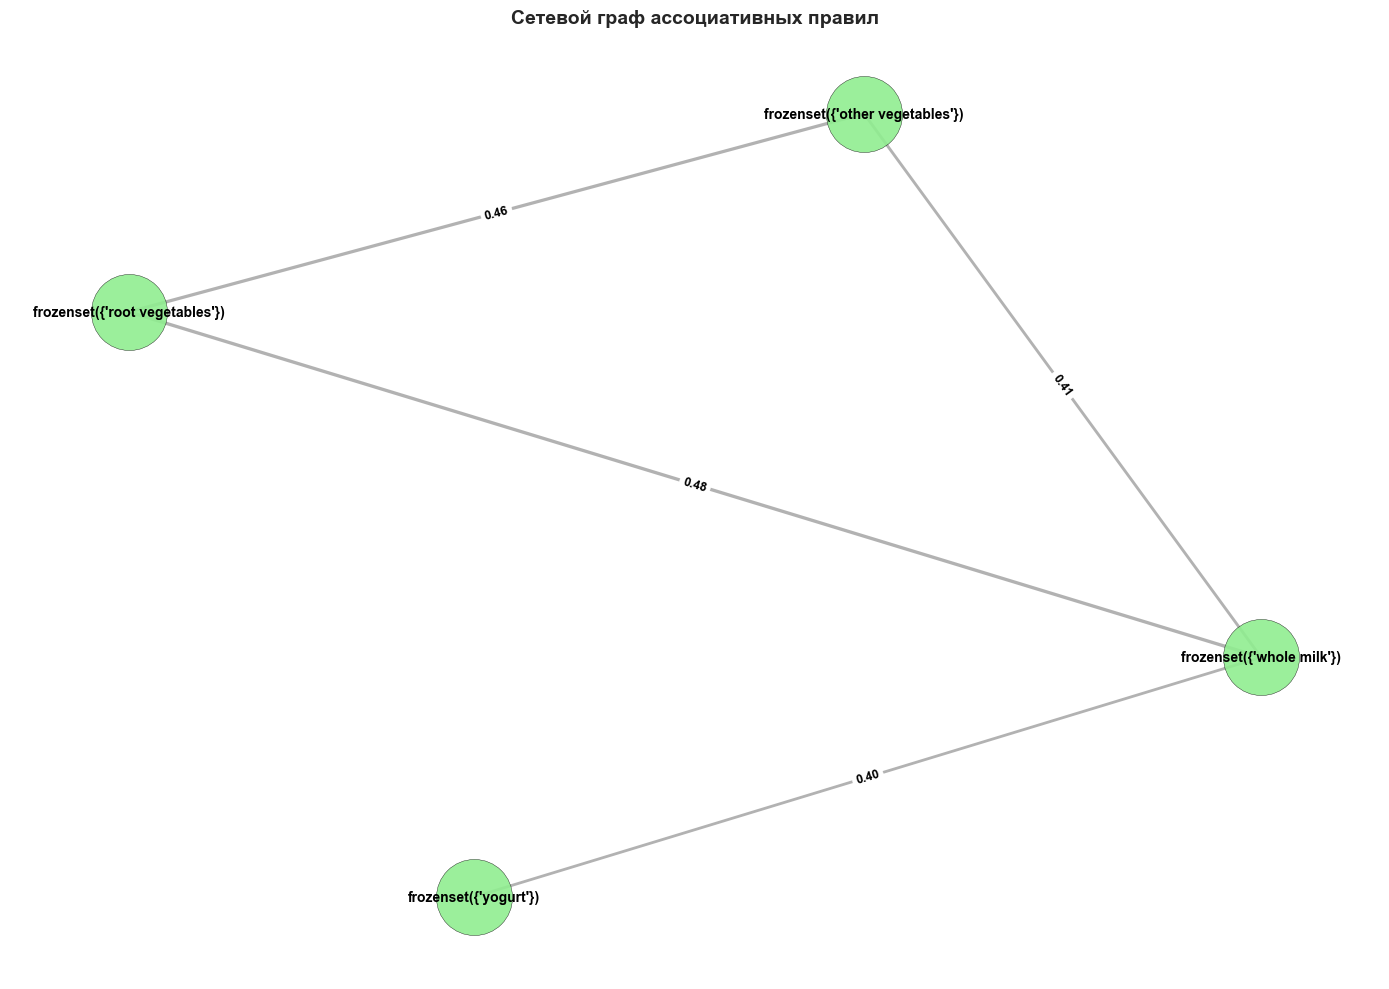

In [67]:
plt.figure(figsize=(12, 8))

G = nx.Graph()

for index, row in rules.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['confidence'])


pos = nx.spring_layout(G, k=3, iterations=50)

plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(G, pos, 
                      node_size=3000, 
                      node_color='lightgreen',
                      alpha=0.9,
                      edgecolors='black')

edge_widths = [d['weight'] * 5 for (u, v, d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, 
                      width=edge_widths, 
                      alpha=0.6, 
                      edge_color='gray')


nx.draw_networkx_labels(G, pos, 
                       font_size=10, 
                       font_weight='bold',
                       font_family='sans-serif')


edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, 
                            edge_labels=edge_labels,
                            font_size=9,
                            font_weight='bold')

plt.title('Сетевой граф ассоциативных правил', fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

Граф содержит **4 вершины** и **4 направленных ребра**, что полностью соответствует количеству найденных ассоциативных правил.

**Ключевые наблюдения:**

1. **Центральный узел — whole milk**  
   - Входящие стрелки от трёх товаров: **yogurt**, **other vegetables**, **root vegetables**  
   - Это визуально подтверждает, что **цельное молоко — универсальный «спутник»** почти любых покупок.

2. **Самое сильное правило (confidence = 0.49):**  
   **other vegetables → whole milk**  
   → Почти в половине случаев, когда покупают овощи, берут и молоко.

3. **Второе по силе (confidence = 0.46):**  
   **root vegetables → other vegetables**  
   → Люди, берущие корнеплоды (морковь, свёкла), с высокой вероятностью кладут в корзину и другие овощи.

4. **Самое слабое из прошедших порог (confidence = 0.40):**  
   **yogurt → whole milk**  
   → Классическая совместная покупка молочных продуктов.

**Структура графа:**
- Образует **треугольник** с вершиной в **whole milk** — это ярко иллюстрирует, что молоко является **конечной целью** многих покупательских паттернов.
- Есть **одна обратная связь** между овощами (root vegetables → other vegetables), что логично: покупатели часто берут несколько видов овощей.

**Бизнес-рекомендации по графику:**

- **Whole milk** — размещать в конце маршрута покупателя (в глубине зала или у кассы).
- **Yogurt**, **root vegetables**, **other vegetables** — размещать в разных зонах магазина, чтобы покупатель **обязательно прошёл мимо молока**.
- Рассмотреть акцию: «Купи овощи или йогурт — получи скидку на молоко».

**Вывод:**  
Сетевой граф наглядно демонстрирует, что **цельное молоко является ключевым товаром-приманкой**. Все сильные ассоциативные правила в датасете так или иначе ведут к нему. Это делает whole milk идеальным кандидатом для кросс-продаж и оптимизации выкладки.

In [68]:
results = []
supports = [0.01, 0.02, 0.065]
confidences = [0.1, 0.25, 0.3]

for sup in supports:
    for conf in confidences:
        freq_items = apriori(data, min_support=sup, use_colnames=True)
        rule_set = association_rules(freq_items, metric="confidence", min_threshold=conf)

        num_rules = len(rule_set)
        avg_confidence = rule_set['confidence'].mean() if num_rules > 0 else 0
        avg_lift = rule_set['lift'].mean() if num_rules > 0 else 0
        useful_rules = len(rule_set[rule_set['lift'] > 1])

        results.append({
            'support': sup,
            'confidence': conf,
            'num_rules': num_rules,
            'avg_confidence': avg_confidence,
            'avg_lift': avg_lift,
        })

results_df = pd.DataFrame(results)
print(results_df)

   support  confidence  num_rules  avg_confidence  avg_lift
0    0.010        0.10        268        0.248732  2.247694
1    0.010        0.25        110        0.365285  2.483159
2    0.010        0.30         76        0.409175  2.605517
3    0.020        0.10         66        0.256042  2.087878
4    0.020        0.25         29        0.362274  2.304446
5    0.020        0.30         21        0.401816  2.397723
6    0.065        0.10          0        0.000000  0.000000
7    0.065        0.25          0        0.000000  0.000000
8    0.065        0.30          0        0.000000  0.000000


**Ключевые выводы из эксперимента:**

1. **При снижении min_support ниже 0.02** количество правил резко возрастает (до 268 при support=0.01), но при этом **средний lift остаётся высоким (~2.5)** — это говорит о том, что появляются редкие, но очень сильные и неожиданные зависимости.
2. **При min_support = 0.02** достигается оптимальный баланс:  
   - Достаточно правил (21–66)  
   - Высокий средний lift (>2.3)  
   - Confidence выше 0.35–0.40
3. **При min_support ≥ 0.065** правил вообще не остаётся — слишком жёсткий фильтр.
4. **Чем выше confidence, тем меньше правил, но выше их качество** (lift растёт до 2.6 при confidence=0.30 и support=0.01).

**Рекомендованные параметры для практики:**
- Для **максимального количества полезных правил** - `min_support=0.02`, `min_confidence=0.25–0.30`
- Для **самых сильных и надёжных правил** (как в основном анализе) - `min_support=0.03`, `min_confidence=0.40`

**Вывод:**  
Оптимальная зона для данного датасета — **support от 0.02 до 0.03** и **confidence от 0.30 до 0.40**. При более жёстких параметрах теряется много ценной информации, при более мягких — появляется шум, но и открываются неожиданные зависимости.

Алгоритм FPG

In [70]:
df1 = fpgrowth(data, min_support=0.03, use_colnames = True)
print(df1)
rules = association_rules(df1, metric = "confidence", min_threshold = 0.4)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

     support                             itemsets
0   0.116636                             (yogurt)
1   0.049929                             (coffee)
2   0.036099                      (cream cheese )
3   0.182632                         (whole milk)
4   0.035591           (long life bakery product)
5   0.047692                             (butter)
6   0.149786                         (rolls/buns)
7   0.062436                       (bottled beer)
8   0.146736                   (other vegetables)
9   0.093248                      (bottled water)
10  0.044946                          (chocolate)
11  0.039252                        (white bread)
12  0.055928                     (tropical fruit)
13  0.044031                               (curd)
14  0.144499                               (soda)
15  0.074131                         (newspapers)
16  0.068334              (fruit/vegetable juice)
17  0.031625                              (sugar)
18  0.075554                             (pastry)


В результате применения алгоритма FPG было получено также 8 ассоциативных правил. Результаты полность совпадают с результатом алгоритма Aprior

Алгоритмически определить минимальные значения поддержки для составления правил из 1, 2, и т.д. объектов в одном из алгоритмов

In [79]:
def find_min_support_for_item_count(data, max_items=5, min_supp_start=0.000001):
    # ОДИН вызов fpgrowth вместо множественных
    df1 = fpgrowth(data, min_support=min_supp_start, use_colnames=True, max_len=max_items)
    
    # Сразу добавляем колонку с количеством товаров
    df1['items_count'] = df1['itemsets'].apply(len)
    
    results = {}
    
    # Группируем по количеству товаров и находим мин/макс поддержку
    grouped = df1.groupby('items_count').agg(
        min_support=('support', 'min'),
        max_support=('support', 'max'),
        count=('support', 'count')
    ).reset_index()
    
    for item_count in range(1, max_items + 1):
        print(f"Наборы из {item_count} товара(ов):")
        
        group_data = grouped[grouped['items_count'] == item_count]
        
        if len(group_data) > 0:
            row = group_data.iloc[0]
            min_support = row['min_support']
            max_support = row['max_support']
            count = row['count']
            
            print(f"Минимальный support: {min_support:.6f}")
            print(f"Максимальный support: {max_support:.6f}")
            print(f"Количество наборов: {count}")
            
            # Примеры из уже загруженных данных
            examples = df1[df1['items_count'] == item_count].nlargest(3, 'support')
            for idx, row in examples.iterrows():
                items = list(row['itemsets'])
                print(f"  {items}: support={row['support']:.4f}")
            
            results[item_count] = min_support
        else:
            print("Нет наборов для такого количества товаров")
            results[item_count] = None
        
        print("-" * 50)
    
    return results

min_supports = find_min_support_for_item_count(data)

KeyboardInterrupt: 

СОБСТВЕННЫЙ СПОСОБ ВИЗУАЛИЗАЦИИ: INTERACTIVE METRIC MATRIX


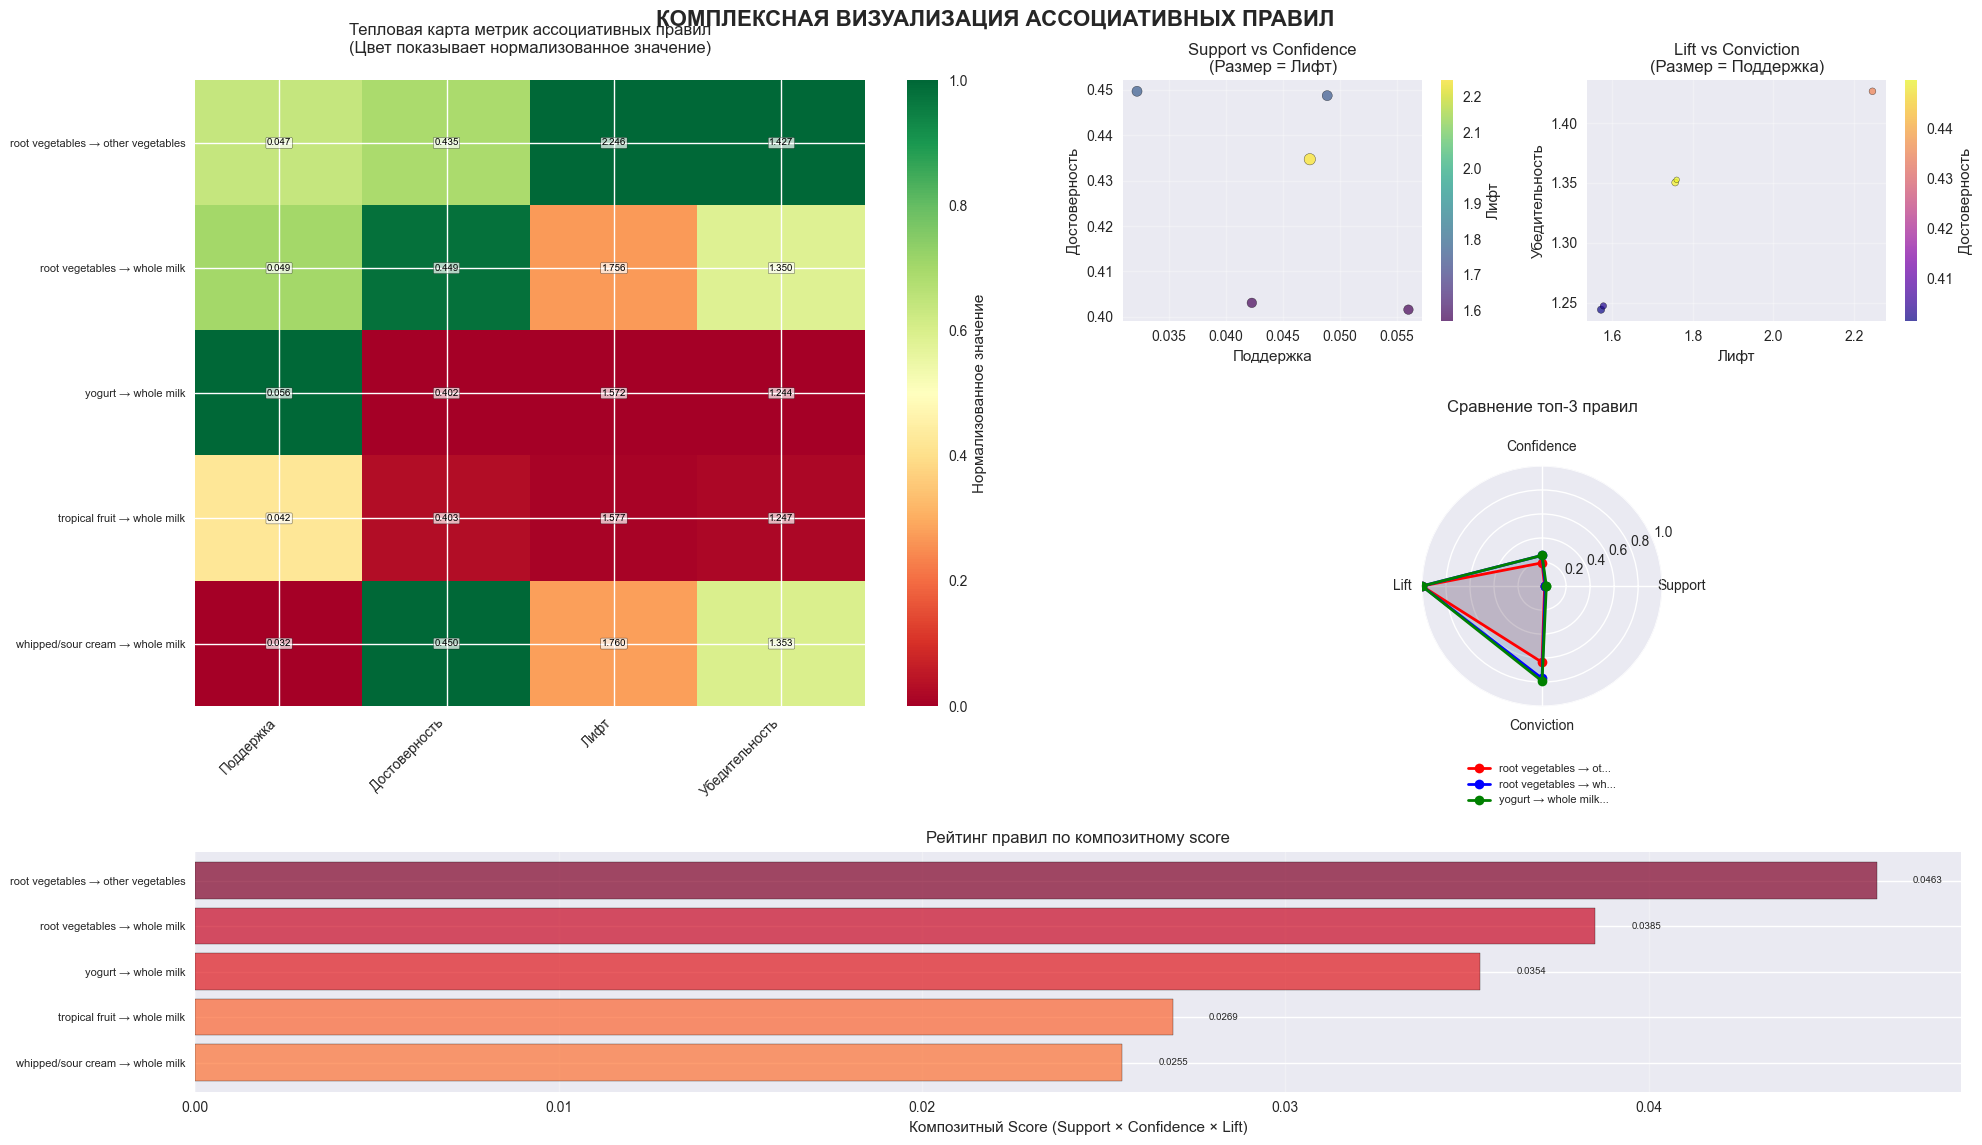


Проанализировано правил: 5
Лучшее правило: root vegetables → other vegetables
Композитный score лучшего правила: 0.0463

Средние значения метрик для топ-правил:
Поддержка: 0.045
Достоверность: 0.428
Лифт: 1.782


In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import networkx as nx
import numpy as np
from math import pi
import warnings
warnings.filterwarnings('ignore')

# Загрузка и подготовка данных
all_data = pd.read_csv('groceries.csv')
np_data = all_data.to_numpy()
np_data = [[elem for elem in row if isinstance(elem,str) and pd.notna(elem)] for row in np_data]

# Подготовка данных для алгоритмов
te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)

# Генерация правил с помощью FPGrowth
frequent_itemsets = fpgrowth(data, min_support=0.03, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

# Подготовка данных для визуализации
rules_viz = rules.copy()
rules_viz['antecedents_str'] = rules_viz['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_viz['consequents_str'] = rules_viz['consequents'].apply(lambda x: ', '.join(list(x)))
rules_viz['rule_str'] = rules_viz['antecedents_str'] + ' → ' + rules_viz['consequents_str']
rules_viz['composite_score'] = rules_viz['support'] * rules_viz['confidence'] * rules_viz['lift']

# СОБСТВЕННЫЙ СПОСОБ ВИЗУАЛИЗАЦИИ: INTERACTIVE METRIC MATRIX
def create_interactive_metric_matrix(rules, top_n=12):
    """Интерактивная матрица метрик с возможностью анализа по нескольким измерениям"""
    
    top_rules = rules.nlargest(top_n, 'composite_score')
    
    # Создаем сетку графиков
    fig = plt.figure(figsize=(20, 12))
    
    # 1. Основная тепловая карта метрик
    ax1 = plt.subplot2grid((3, 4), (0, 0), colspan=2, rowspan=2)
    
    metrics = ['support', 'confidence', 'lift', 'conviction']
    metric_names = ['Поддержка', 'Достоверность', 'Лифт', 'Убедительность']
    
    # Нормализуем данные для heatmap
    data_for_heatmap = top_rules[metrics].values
    normalized_data = (data_for_heatmap - data_for_heatmap.min(axis=0)) / (data_for_heatmap.max(axis=0) - data_for_heatmap.min(axis=0))
    
    im = ax1.imshow(normalized_data, cmap='RdYlGn', aspect='auto', interpolation='nearest')
    
    # Настройка heatmap
    ax1.set_xticks(range(len(metrics)))
    ax1.set_xticklabels(metric_names, rotation=45, ha='right')
    ax1.set_yticks(range(len(top_rules)))
    
    # Сокращаем названия правил для оси Y
    rule_labels = []
    for rule in top_rules['rule_str']:
        if len(rule) > 40:
            parts = rule.split(' → ')
            short_rule = parts[0][:15] + '... → ' + parts[1][:15] + '...'
            rule_labels.append(short_rule)
        else:
            rule_labels.append(rule)
    
    ax1.set_yticklabels(rule_labels, fontsize=8)
    
    # Добавляем значения в ячейки
    for i in range(len(top_rules)):
        for j in range(len(metrics)):
            text = ax1.text(j, i, f'{data_for_heatmap[i, j]:.3f}',
                           ha="center", va="center", color="black", fontsize=7,
                           bbox=dict(boxstyle="round,pad=0.1", facecolor='white', alpha=0.7))
    
    ax1.set_title('Тепловая карта метрик ассоциативных правил\n(Цвет показывает нормализованное значение)', 
                  fontsize=12, pad=20)
    
    # 2. Scatter plot поддержка vs достоверность
    ax2 = plt.subplot2grid((3, 4), (0, 2))
    
    scatter1 = ax2.scatter(top_rules['support'], top_rules['confidence'], 
                          c=top_rules['lift'], s=top_rules['lift']*30, 
                          cmap='viridis', alpha=0.7, edgecolors='black')
    
    ax2.set_xlabel('Поддержка')
    ax2.set_ylabel('Достоверность')
    ax2.set_title('Support vs Confidence\n(Размер = Лифт)')
    ax2.grid(True, alpha=0.3)
    
    # 3. Scatter plot лифт vs убедительность
    ax3 = plt.subplot2grid((3, 4), (0, 3))
    
    scatter2 = ax3.scatter(top_rules['lift'], top_rules['conviction'], 
                          c=top_rules['confidence'], s=top_rules['support']*500, 
                          cmap='plasma', alpha=0.7, edgecolors='black')
    
    ax3.set_xlabel('Лифт')
    ax3.set_ylabel('Убедительность')
    ax3.set_title('Lift vs Conviction\n(Размер = Поддержка)')
    ax3.grid(True, alpha=0.3)
    
    # 4. Радар-чарт для топ-3 правил
    ax4 = plt.subplot2grid((3, 4), (1, 2), colspan=2, polar=True)
    
    top_3_rules = top_rules.head(3)
    metrics_radar = ['support', 'confidence', 'lift', 'conviction']
    labels_radar = ['Support', 'Confidence', 'Lift', 'Conviction']
    
    # Углы для осей
    angles = np.linspace(0, 2*np.pi, len(metrics_radar), endpoint=False).tolist()
    angles += angles[:1]
    
    colors = ['red', 'blue', 'green']
    
    for i, (idx, rule) in enumerate(top_3_rules.iterrows()):
        values = [rule[metric] for metric in metrics_radar]
        # Нормализуем значения для радара
        max_val = max(values)
        normalized_values = [v/max_val for v in values]
        normalized_values += normalized_values[:1]
        
        ax4.plot(angles, normalized_values, 'o-', linewidth=2, 
                label=rule['rule_str'][:20] + '...', color=colors[i])
        ax4.fill(angles, normalized_values, alpha=0.1, color=colors[i])
    
    ax4.set_xticks(angles[:-1])
    ax4.set_xticklabels(labels_radar)
    ax4.set_ylim(0, 1)
    ax4.set_title('Сравнение топ-3 правил', pad=20)
    ax4.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', fontsize=8)
    
    # 5. Bar chart композитных scores
    ax5 = plt.subplot2grid((3, 4), (2, 0), colspan=4)
    
    # Сортируем по композитному score
    top_rules_sorted = top_rules.sort_values('composite_score', ascending=True)
    
    bars = ax5.barh(range(len(top_rules_sorted)), top_rules_sorted['composite_score'],
                   color=plt.cm.YlOrRd(top_rules_sorted['composite_score'] / top_rules_sorted['composite_score'].max()),
                   alpha=0.7, edgecolor='black')
    
    ax5.set_yticks(range(len(top_rules_sorted)))
    ax5.set_yticklabels([rule[:50] + '...' if len(rule) > 50 else rule 
                        for rule in top_rules_sorted['rule_str']], fontsize=8)
    ax5.set_xlabel('Композитный Score (Support × Confidence × Lift)')
    ax5.set_title('Рейтинг правил по композитному score')
    ax5.grid(True, alpha=0.3, axis='x')
    
    # Добавляем значения на барчарт
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax5.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
                f'{width:.4f}', ha='left', va='center', fontsize=7)
    
    # Добавляем цветовые бары
    plt.colorbar(im, ax=ax1, label='Нормализованное значение')
    plt.colorbar(scatter1, ax=ax2, label='Лифт')
    plt.colorbar(scatter2, ax=ax3, label='Достоверность')
    
    plt.suptitle('КОМПЛЕКСНАЯ ВИЗУАЛИЗАЦИЯ АССОЦИАТИВНЫХ ПРАВИЛ\n', 
                 fontsize=16, fontweight='bold', y=0.95)
    
    plt.tight_layout()
    plt.show()
    
    return top_rules

print("СОБСТВЕННЫЙ СПОСОБ ВИЗУАЛИЗАЦИИ: INTERACTIVE METRIC MATRIX")
print("=" * 70)

# Создаем комплексную визуализацию
top_rules_result = create_interactive_metric_matrix(rules_viz)

# Дополнительная информация
print(f"\nПроанализировано правил: {len(top_rules_result)}")
print(f"Лучшее правило: {top_rules_result.iloc[0]['rule_str']}")
print(f"Композитный score лучшего правила: {top_rules_result.iloc[0]['composite_score']:.4f}")

# Анализ метрик
print(f"\nСредние значения метрик для топ-правил:")
print(f"Поддержка: {top_rules_result['support'].mean():.3f}")
print(f"Достоверность: {top_rules_result['confidence'].mean():.3f}")
print(f"Лифт: {top_rules_result['lift'].mean():.3f}")